In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, classification_report,
                             precision_score, recall_score, f1_score, roc_auc_score,
                             accuracy_score)


In [ ]:
df = pd.read_csv('/content/Covid Data.csv')

In [ ]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2.0,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1.0,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2.0,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2.0,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2.0,2.0,2.0,3.0,97.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77065 entries, 0 to 77064
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   USMER                 77065 non-null  int64  
 1   MEDICAL_UNIT          77065 non-null  int64  
 2   SEX                   77065 non-null  int64  
 3   PATIENT_TYPE          77065 non-null  int64  
 4   DATE_DIED             77065 non-null  object 
 5   INTUBED               77065 non-null  int64  
 6   PNEUMONIA             77065 non-null  int64  
 7   AGE                   77065 non-null  int64  
 8   PREGNANT              77065 non-null  int64  
 9   DIABETES              77065 non-null  int64  
 10  COPD                  77065 non-null  int64  
 11  ASTHMA                77065 non-null  int64  
 12  INMSUPR               77065 non-null  int64  
 13  HIPERTENSION          77065 non-null  int64  
 14  OTHER_DISEASE         77065 non-null  int64  
 15  CARDIOVASCULAR     

In [ ]:
df['CLASIFFICATION_FINAL'].value_counts()

,count
CLASIFFICATION_FINAL,
3.0,52251
7.0,16009
6.0,5860
2.0,1249
5.0,1147
1.0,355
4.0,193


In [ ]:
cols_with_missing_values = ['PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA',
                     'INMSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'RENAL_CHRONIC',
                     'OTHER_DISEASE', 'OBESITY', 'TOBACCO']

for col in cols_with_missing_values:
    df[col] = df[col].replace([97, 99], 2)



df = df[df['CLASIFFICATION_FINAL'].isin([1, 2, 3])]


In [ ]:
df['CLASIFFICATION_FINAL'].value_counts()

,count
CLASIFFICATION_FINAL,
3.0,52251
2.0,1249
1.0,355


In [ ]:
df.isna().sum()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
DATE_DIED,0
INTUBED,0
PNEUMONIA,0
AGE,0
PREGNANT,0
DIABETES,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53855 entries, 0 to 77063
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   USMER                 53855 non-null  int64  
 1   MEDICAL_UNIT          53855 non-null  int64  
 2   SEX                   53855 non-null  int64  
 3   PATIENT_TYPE          53855 non-null  int64  
 4   DATE_DIED             53855 non-null  object 
 5   INTUBED               53855 non-null  int64  
 6   PNEUMONIA             53855 non-null  int64  
 7   AGE                   53855 non-null  int64  
 8   PREGNANT              53855 non-null  int64  
 9   DIABETES              53855 non-null  int64  
 10  COPD                  53855 non-null  int64  
 11  ASTHMA                53855 non-null  int64  
 12  INMSUPR               53855 non-null  int64  
 13  HIPERTENSION          53855 non-null  int64  
 14  OTHER_DISEASE         53855 non-null  int64  
 15  CARDIOVASCULAR        53

In [ ]:
def is_high_risk (row):
    return int(
        (row['PATIENT_TYPE'] == 2) or
        (row['INTUBED'] == 1) or
        (row['ICU'] == 1) or
        (row['DATE_DIED'] != '9999-99-99')or
        (row['USMER'] == 3)
    )

df['high_risk'] = df.apply(is_high_risk, axis=1)


# PATIENT_TYPE == 2
# ➔ يعني المريض اتنقل للمستشفى.

# INTUBED == 1
# ➔ يعني المريض احتاج جهاز تنفس صناعي .

# ICU == 1
# ➔ يعني المريض دخل العناية المركزة .

# DATE_DIED != '9999-99-99'
# ➔ يعني المريض توفى بالفعل .




In [ ]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,high_risk
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2.0,2.0,2.0,3.0,97.0,1
2,2,1,2,2,09/06/2020,1,2,55,2,1,...,2,2,2,2,2.0,2.0,2.0,3.0,2.0,1
4,2,1,2,1,21/06/2020,97,2,68,2,1,...,2,1,2,2,2.0,2.0,2.0,3.0,97.0,1
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2.0,2.0,2.0,3.0,2.0,1
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2.0,2.0,2.0,3.0,97.0,0


In [ ]:
df.drop(['PATIENT_TYPE', 'INTUBED', 'ICU', 'DATE_DIED','USMER' ], axis=1, inplace=True)

In [ ]:
df.head()

,MEDICAL_UNIT,SEX,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,high_risk
0,1,1,1,65,2,2,2,2,2,1,2,2,2.0,2.0,2.0,3.0,1
2,1,2,2,55,2,1,2,2,2,2,2,2,2.0,2.0,2.0,3.0,1
4,1,2,2,68,2,1,2,2,2,1,2,2,2.0,2.0,2.0,3.0,1
5,1,1,1,40,2,2,2,2,2,2,2,2,2.0,2.0,2.0,3.0,1
6,1,1,2,64,2,2,2,2,2,2,2,2,2.0,2.0,2.0,3.0,0


In [ ]:
binary_columns = ['SEX', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA',
                  'INMSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'RENAL_CHRONIC',
                  'OTHER_DISEASE', 'OBESITY', 'TOBACCO']


for col in binary_columns:
    df[col] = df[col].replace({1: 1, 2: 0});


In [ ]:
df.head()

,MEDICAL_UNIT,SEX,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,high_risk
0,1,1,1,65,0,0,0,0,0,1,0,0,0.0,0.0,0.0,3.0,1
2,1,0,0,55,0,1,0,0,0,0,0,0,0.0,0.0,0.0,3.0,1
4,1,0,0,68,0,1,0,0,0,1,0,0,0.0,0.0,0.0,3.0,1
5,1,1,1,40,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,1
6,1,1,0,64,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0


In [ ]:
X = df.drop('high_risk', axis=1)
y = df['high_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


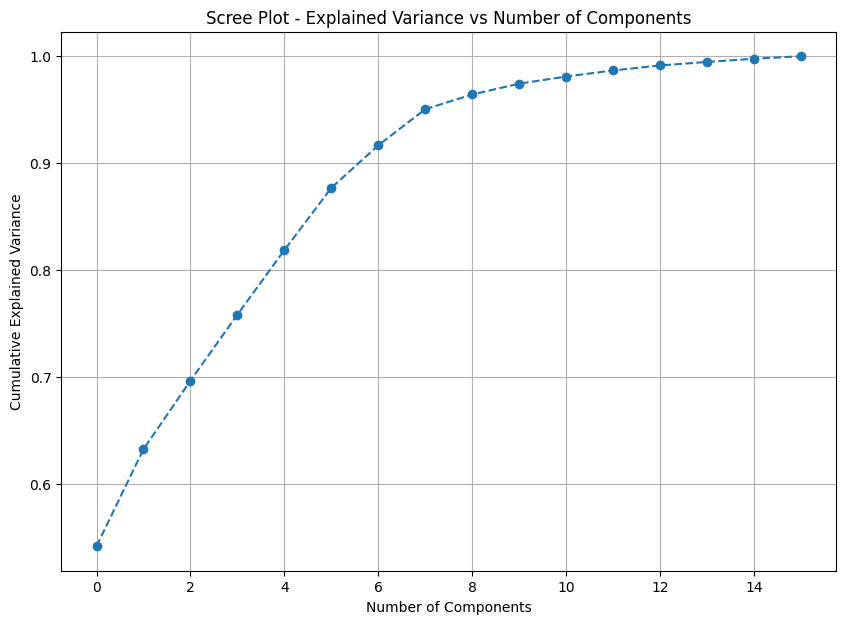

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# نعمل PCA على كل الداتا بدون تحديد عدد مكونات
pca = PCA()
pca.fit(X_train_scaled)

# نجيب نسبة التباين اللي بيغطيها كل مكون
explained_variance_ratio = pca.explained_variance_ratio_

# نرسم Scree Plot
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Explained Variance vs Number of Components')
plt.grid(True)
plt.show()


In [ ]:
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True)
}


In [ ]:
def evaluate_model(name, model, X_tr, X_te):
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    y_proba = model.predict_proba(X_te)[:, 1]

    print(f"\n{name}")
    print(classification_report(y_test, y_pred))

    # Calculate all metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(cm, display_labels=['Low Risk', 'High Risk']).plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Print metrics
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)
    print("ROC AUC:", roc_auc)

    # Visualize all metrics in a bar chart
    plt.figure(figsize=(10, 6))
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
    values = [acc, prec, rec, f1, roc_auc]

    sns.barplot(x=metrics, y=values)
    plt.title(f'Performance Metrics - {name}')
    plt.ylim(0, 1)
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f'{v:.3f}', ha='center')
    plt.tight_layout()
    plt.show()

    # Visualize metrics individually
    plt.figure(figsize=(15, 3))



Evaluation Before PCA

Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      3737
           1       0.91      0.89      0.90      7034

    accuracy                           0.87     10771
   macro avg       0.85      0.86      0.85     10771
weighted avg       0.87      0.87      0.87     10771



<Figure size 800x600 with 0 Axes>

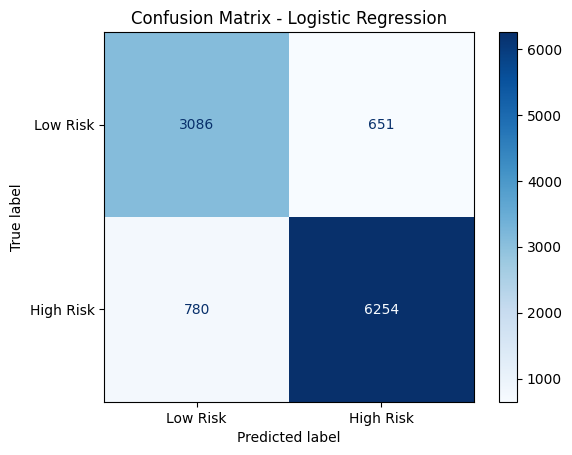

Accuracy: 0.8671432550366726
Precision: 0.9057204923968138
Recall: 0.889110036963321
F1 Score: 0.8973384030418251
ROC AUC: 0.9299747037003419


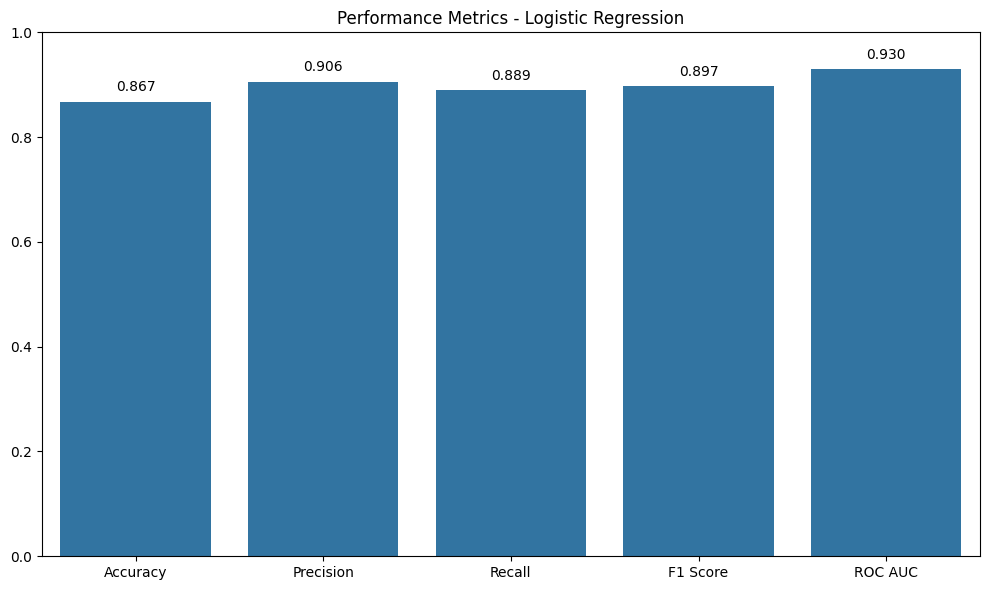

------------------------------------------

Random Forest
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      3737
           1       0.90      0.89      0.90      7034

    accuracy                           0.86     10771
   macro avg       0.85      0.85      0.85     10771
weighted avg       0.87      0.86      0.87     10771



<Figure size 1500x300 with 0 Axes>

<Figure size 800x600 with 0 Axes>

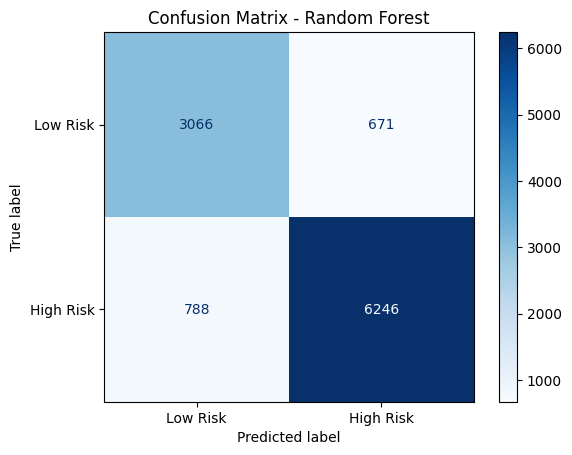

Accuracy: 0.8645436821093677
Precision: 0.9029926268613561
Recall: 0.8879727040090987
F1 Score: 0.8954196831768332
ROC AUC: 0.9248551456441282


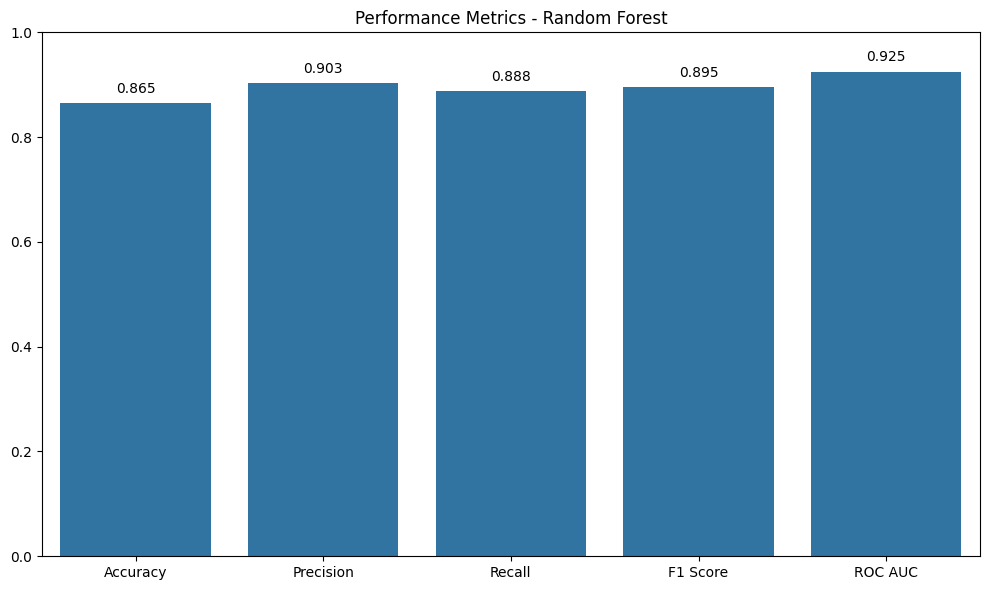

------------------------------------------


In [ ]:
print("Evaluation Before PCA")
for name, model in models.items():
    evaluate_model(name, model, X_train_scaled, X_test_scaled)
    print("------------------------------------------")


In [ ]:
print("Evaluation After PCA")
for name, model in models.items():
    evaluate_model(name, model, X_train_pca, X_test_pca)
    print("------------------------------------------")    # Run the comparison visualization


In [ ]:
def compare_before_after_pca(models, X_train_scaled, X_test_scaled, X_train_pca, X_test_pca, y_train, y_test):
    """
    Create visualizations comparing model performance before and after PCA

    Parameters:
    -----------
    models : dict
        Dictionary of model names and model instances
    X_train_scaled, X_test_scaled : array
        Scaled data before PCA
    X_train_pca, X_test_pca : array
        Data after PCA transformation
    y_train, y_test : array
        Target variables
    """

    # Store results for all models
    results = {}

    # Evaluate all models both before and after PCA
    for name, model in models.items():
        results[name] = {'before': {}, 'after': {}}

        # Before PCA
        model_before = model.__class__(**model.get_params())
        model_before.fit(X_train_scaled, y_train)
        y_pred_before = model_before.predict(X_test_scaled)
        y_proba_before = model_before.predict_proba(X_test_scaled)[:, 1]

        # After PCA
        model_after = model.__class__(**model.get_params())
        model_after.fit(X_train_pca, y_train)
        y_pred_after = model_after.predict(X_test_pca)
        y_proba_after = model_after.predict_proba(X_test_pca)[:, 1]

        # Calculate metrics
        results[name]['before']['acc'] = accuracy_score(y_test, y_pred_before)
        results[name]['before']['prec'] = precision_score(y_test, y_pred_before)
        results[name]['before']['rec'] = recall_score(y_test, y_pred_before)
        results[name]['before']['f1'] = f1_score(y_test, y_pred_before)
        results[name]['before']['roc_auc'] = roc_auc_score(y_test, y_proba_before)

        results[name]['after']['acc'] = accuracy_score(y_test, y_pred_after)
        results[name]['after']['prec'] = precision_score(y_test, y_pred_after)
        results[name]['after']['rec'] = recall_score(y_test, y_pred_after)
        results[name]['after']['f1'] = f1_score(y_test, y_pred_after)
        results[name]['after']['roc_auc'] = roc_auc_score(y_test, y_proba_after)

    # Create comparison visualizations
    metrics = ['acc', 'prec', 'rec', 'f1', 'roc_auc']
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

    # 1. Compare all metrics for each model before and after PCA
    for name in models.keys():
        plt.figure(figsize=(15, 7))

        # Prepare data for plotting
        before_values = [results[name]['before'][m] for m in metrics]
        after_values = [results[name]['after'][m] for m in metrics]

        # Set width of bars
        barWidth = 0.35

        # Set position of bars on X axis
        r1 = np.arange(len(metrics))
        r2 = [x + barWidth for x in r1]

        # Create bars
        plt.bar(r1, before_values, width=barWidth, label='Before PCA', color='skyblue')
        plt.bar(r2, after_values, width=barWidth, label='After PCA', color='lightgreen')

        # Add values on bars
        for i, v in enumerate(before_values):
            plt.text(r1[i], v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

        for i, v in enumerate(after_values):
            plt.text(r2[i], v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

        # Add labels and title
        plt.xlabel('Metrics', fontweight='bold')
        plt.ylabel('Score', fontweight='bold')
        plt.xticks([r + barWidth/2 for r in range(len(metrics))], metric_names)
        plt.title(f'Metrics Comparison Before vs After PCA - {name}')
        plt.ylim(0, 1.1)

        plt.legend()
        plt.tight_layout()
        plt.show()

    # 2. Create single visualization comparing all models for each metric
    plt.figure(figsize=(20, 15))

    # Create subplots for each metric
    for i, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
        plt.subplot(2, 3, i+1)

        model_names = list(models.keys())
        before_values = [results[name]['before'][metric] for name in model_names]
        after_values = [results[name]['after'][metric] for name in model_names]

        # Set width of bars
        barWidth = 0.35

        # Set position of bars on X axis
        r1 = np.arange(len(model_names))
        r2 = [x + barWidth for x in r1]

        # Create bars
        plt.bar(r1, before_values, width=barWidth, label='Before PCA', color='skyblue')
        plt.bar(r2, after_values, width=barWidth, label='After PCA', color='lightgreen')

        # Add values on bars
        for i, v in enumerate(before_values):
            plt.text(r1[i], v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

        for i, v in enumerate(after_values):
            plt.text(r2[i], v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

        # Add labels and title
        plt.xlabel('Models', fontweight='bold')
        plt.ylabel('Score', fontweight='bold')
        plt.xticks([r + barWidth/2 for r in range(len(model_names))], model_names, rotation=45, ha='right')
        plt.title(f'{metric_name} Comparison')
        plt.ylim(0, 1.1)

        if i == 0:  # Add legend only to the first subplot
            plt.legend()

    plt.tight_layout()
    plt.show()

    # 3. Create a heatmap showing the performance improvement/degradation after PCA
    plt.figure(figsize=(12, 6))

    # Calculate differences (after - before)
    diff_data = np.zeros((len(models), len(metrics)))

    for i, name in enumerate(models.keys()):
        for j, metric in enumerate(metrics):
            diff_data[i, j] = results[name]['after'][metric] - results[name]['before'][metric]

    sns.heatmap(diff_data, annot=True, fmt=".3f", cmap="RdYlGn",
                xticklabels=metric_names, yticklabels=models.keys(),
                center=0, vmin=-0.1, vmax=0.1)

    plt.title('Performance Difference After PCA (positive = improvement)')
    plt.tight_layout()
    plt.show()

# Add this code cell to your notebook and then call the function:
# compare_before_after_pca(models, X_train_scaled, X_test_scaled, X_train_pca, X_test_pca, y_train, y_test)

In [ ]:
# Run the comparison visualization
compare_before_after_pca(models, X_train_scaled, X_test_scaled, X_train_pca, X_test_pca, y_train, y_test)